# Numpy基础：数组和矢量计算

http://www.numpy.org/

NumPy是使用Python进行科学计算的基本软件包。它包含以下内容：

- 强大的N维数组对象

- 复杂的（广播）功能

- 集成C / C ++和Fortran代码的工具

- 有用的线性代数，傅立叶变换和随机数功能

数组操作很很很重要！！！！
- 便捷
- 快速

In [1]:
import numpy as np

In [3]:
arr=np.arange(10)
print(arr)
listTest=list(arr)
print(type(arr))
print(listTest)
print(type(listTest))

[0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'>
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'list'>


In [10]:
my_arr = np.arange(1000000)     #调用numpy创建一维数组
my_list = list(range(1000000))  #使用列表创建一维数组

In [11]:
my_arr1=np.arange(3)
print(my_arr1)
#np.arrange的乘号是把里面的每一个元素相乘
for _ in range(10): my_arr1 = my_arr1 * 2
print(my_arr1)

[0 1 2]
[   0 1024 2048]


# 本节导航
- 1. NumPy的ndarray：一种多维数组对象
- 2. Numpy通用函数：快速的元素级数组函数
- 3. 利用数组进行数据处理
- 4. 伪随机数
- 5. 简单爬虫

# 1. NumPy的ndarray：一种多维数组对象

- Numpy导入

In [12]:
#导入惯例，as为重命名
import numpy as np

In [13]:
#dir(np)

python dir 函数

dir() 函数不带参数时，返回当前范围内的变量、方法和定义的类型列表；带参数时，返回参数的属性、方法列表。如果参数包含方法__dir__()，该方法将被调用。如果参数不包含__dir__()，该方法将最大限度地收集参数信息。

In [15]:
#dir()

numpy参考文档http://www.numpy.org/


NumPy最重要的一个特点就是其N维数组对象（即ndarray），该对象是一个快速而灵活的大数据集容器。可以利用这种数组对**整块数据**执行一些数学运算，其语法跟标量元素之间的运算一样。

In [19]:
#返回一个大小为2*3的ndarray
data = np.random.randn(2, 3)
print(data)

[[-0.55715672 -0.57682678 -0.31859245]
 [ 1.40920395 -0.10423343 -0.22675792]]


In [20]:
#所有元素都乘以10
print('data * 10: \n', data * 10)

data * 10: 
 [[-5.57156725 -5.76826779 -3.18592447]
 [14.09203946 -1.04233434 -2.26757923]]


**ndarray所有元素必须是相同类型的**
- shape：表示各维度大小的元组
- dtype：用于说明数组数据类型的对象

In [21]:
print('data shape:', data.shape)
print('data dtype:', data.dtype)

data shape: (2, 3)
data dtype: float64


## 1.1. 创建数组

- array()：将Python对象(list/tuple)转换为数组

In [22]:
ls_1 = list(range(4))
ls_1

[0, 1, 2, 3]

In [24]:
#将列表转化为数组，注意不可以用np.arange(ls_1)
arr_1 = np.array(ls_1)
#注意 列表有逗号隔开，np array数组没有逗号
print(arr_1)

[0 1 2 3]


In [25]:
[ls_1,ls_1]

[[0, 1, 2, 3], [0, 1, 2, 3]]

In [26]:
ls_2 = [ls_1]*2
print(ls_2)

[[0, 1, 2, 3], [0, 1, 2, 3]]


In [27]:
arr_2 = np.array(ls_2)
print(arr_2)

[[0 1 2 3]
 [0 1 2 3]]


In [29]:
# 查看arr_2属性
print(arr_2.ndim) #n代表一个，dim维度,ndim是几个维度
print(arr_2.shape)#shape看每个维度的大小多少,结果是 长多少，宽多少

2
(2, 4)


np.array会尝试为新建的这个数组推断出一个较为合适的数据类型。数据类型保存在一个特殊的dtype对象中

In [30]:

ls_3 = [1, 3, 1.5]
#np adarray 每个元素的类型是一样的，这个和list要有区别
arr_3 = np.array(ls_3)

In [31]:
print(arr_1.dtype)
print(arr_2.dtype)
print(arr_3.dtype)

int32
int32
float64


In [32]:
print(arr_3)

[1.  3.  1.5]


- empty()：分配指定大小的数组，未初始化 ，随机填充值

In [33]:
print(np.empty((2,2)))

[[7.57789675e-312 4.94065646e-324]
 [0.00000000e+000 0.00000000e+000]]


***注意*** 元组形式输入shape，因为shape返回值是元组形式

In [34]:
print(np.empty(2,2))

TypeError: data type not understood

- zeros(), ones()：创建全为0或1的数组

In [36]:
arr_0s = np.zeros((2,3),dtype = 'int32')
#如果不指定类型，默认为float
arr_1s = np.ones((2,2))
print(arr_0s)
print(arr_0s.dtype)
print(arr_1s)
print(arr_1s.dtype)

[[0 0 0]
 [0 0 0]]
int32
[[1. 1.]
 [1. 1.]]
float64


In [37]:
#help(np.zeros)

In [38]:
#np.zeros??

- ones_like(),zeros_like():根据指定的形状和type，创建全1、全0数组
- eye(), diag()：创建对角矩阵
- arange()：通过开始值、终值和步长创建一维数组
- linspace()：通过开始值、终值和元素个数创建一维数组
- logspace()：同上，但创建等比数列  

In [39]:
print(arr_3)
np.ones_like(arr_3)

[1.  3.  1.5]


array([1., 1., 1.])

In [41]:
#help(np.eye)

In [50]:
#创建一个4*3列的对角矩阵，第三个参数代表1出现的地方
np.eye(4,3,1) #k>0 上对角， k<0 下对角

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
np.eye(4,3,0) 

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [43]:
np.eye(4,3,-1) 

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [358]:
np.diag((2,3,5,4))

array([[2, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 5, 0],
       [0, 0, 0, 4]])

## 1.2. 数组的基本属性

- ndim：维度
- shape：各维度大小（元组）
- size：元素个数
- dtype：数据类型

**ndarray的数据类型**

dtype方法：查看ndarray数据类型

- ndarry基本数据类型

In [44]:
print((set(np.typeDict.values())))

{<class 'numpy.uint32'>, <class 'numpy.str_'>, <class 'numpy.datetime64'>, <class 'numpy.float32'>, <class 'numpy.bool_'>, <class 'numpy.float64'>, <class 'numpy.clongdouble'>, <class 'numpy.float16'>, <class 'numpy.bytes_'>, <class 'numpy.uint16'>, <class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'numpy.timedelta64'>, <class 'numpy.int32'>, <class 'numpy.uint8'>, <class 'numpy.longdouble'>, <class 'numpy.void'>, <class 'numpy.int64'>, <class 'numpy.uintc'>, <class 'numpy.object_'>, <class 'numpy.int8'>, <class 'numpy.intc'>, <class 'numpy.uint64'>, <class 'numpy.int16'>}


### 1.2.1 指定数据类型--dtype

In [45]:
np.array(range(10),dtype = 'c8')

array([0.+0.j, 1.+0.j, 2.+0.j, 3.+0.j, 4.+0.j, 5.+0.j, 6.+0.j, 7.+0.j,
       8.+0.j, 9.+0.j], dtype=complex64)

In [48]:
#f4=float32
np.array(range(10),dtype = 'f4')

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)

In [50]:
#i1=int8
np.array(range(255,260), dtype = 'i1')

array([-1,  0,  1,  2,  3], dtype=int8)

In [51]:
arr_2=np.array(range(255,260), dtype = 'i2')

In [52]:
arr_2

array([255, 256, 257, 258, 259], dtype=int16)

In [55]:
arr_2.dtype

dtype('int16')

dtype 的两个作用：
- 指定数组数据类型
- 查看数据类型

### 1.2.2 转换数据类型--arr.astype(dtype)

- 可以通过ndarray的astype方法明确地将一个数组从一个dtype转换成另一个dtype

In [56]:
arr_4 = np.array(range(5))
print(arr_4,arr_4.dtype)

float_arr4 = arr_4.astype('f8')
print(float_arr4,float_arr4.dtype)

[0 1 2 3 4] int32
[0. 1. 2. 3. 4.] float64


In [57]:
#arr_4.astype??

- 将浮点数转换成整数，则小数部分将会被截取删除,可以理解为向下取整

In [58]:
arr_5 = arr_4 + arr_4/10
print(arr_5,arr_5.dtype)

int_arr5 = arr_5.astype('i4')
print(int_arr5, int_arr5.dtype)

[0.  1.1 2.2 3.3 4.4] float64
[0 1 2 3 4] int32


- 如果某字符串数组表示的全是数字，也可以用astype将其转换为数值形式

In [59]:
arr_strs = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
print(arr_strs,arr_strs.dtype)
float_arr_strs = arr_strs.astype(float)
print(float_arr_strs,float_arr_strs.dtype)

[b'1.25' b'-9.6' b'42'] |S4
[ 1.25 -9.6  42.  ] float64


## 1.3. 数组形状操作

- reshape  有返回值

In [61]:
arr_5 = np.array(range(9))
print(arr_5)
print(len(arr_5))
reshape_arr5 = arr_5.reshape((3,3))
print(reshape_arr5)

[0 1 2 3 4 5 6 7 8]
9
[[0 1 2]
 [3 4 5]
 [6 7 8]]


调用reshap 改变数组形状

In [64]:
arr_5[0] = 99
print('arr_5:\n',arr_5)
print('reshape_arr5:\n',reshape_arr5)

arr_5:
 [99  1  2  3  4  5  6  7  8]
reshape_arr5:
 [[99  1  2]
 [ 3  4  5]
 [ 6  7  8]]


In [65]:
print('arr_5:\n',arr_5)
print('reshape_arr5:\n',reshape_arr5)
reshape_arr5[0][0] = 999
print('arr_5:\n',arr_5)
print('reshape_arr5:\n',reshape_arr5)

arr_5:
 [99  1  2  3  4  5  6  7  8]
reshape_arr5:
 [[99  1  2]
 [ 3  4  5]
 [ 6  7  8]]
arr_5:
 [999   1   2   3   4   5   6   7   8]
reshape_arr5:
 [[999   1   2]
 [  3   4   5]
 [  6   7   8]]


- -1代表的维度的取值需要根据数组的长度和其他维度来共同确认

In [67]:
reshape_arr5.reshape((-1,3))

array([[999,   1,   2],
       [  3,   4,   5],
       [  6,   7,   8]])

- shape  数组本身改变

In [69]:
arr_5 = np.array(range(9))
print(arr_5)
arr_5.shape = (3,3)
print(arr_5)

[0 1 2 3 4 5 6 7 8]
[[0 1 2]
 [3 4 5]
 [6 7 8]]


- resize  **resize没有返回值,执行后数组本身也可以改变，效果和shape相同**

In [70]:
arr_5 = np.array(range(9))
print('arr_5:\n',arr_5)
resize_arr5 = arr_5.resize(3,3)
print('arr_5:\n',arr_5)
print('resize_arr5:\n',resize_arr5)

arr_5:
 [0 1 2 3 4 5 6 7 8]
arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
resize_arr5:
 None


- ravel 扁平化，就是把数组变成一维

In [71]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print('arr_5:\n',arr_5)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [72]:
ravel_arr5 = arr_5.ravel()
print('ravel_arr5:\n', ravel_arr5)

ravel_arr5:
 [0 1 2 3 4 5 6 7 8]


In [73]:

print('arr_5:\n',arr_5)
print('ravel_arr5:\n',ravel_arr5)
arr_5[0][0] = 999
print('arr_5:\n',arr_5)
print('ravel_arr5:\n',ravel_arr5)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
ravel_arr5:
 [0 1 2 3 4 5 6 7 8]
arr_5:
 [[999   1   2]
 [  3   4   5]
 [  6   7   8]]
ravel_arr5:
 [999   1   2   3   4   5   6   7   8]


- flatten 扁平化  *改变其扁平化的值，原来数组的值不会改变*

In [74]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print('arr_5:\n',arr_5)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]


In [75]:
flatten_arr5 = arr_5.flatten()
print('flatten_arr5:\n', flatten_arr5)

flatten_arr5:
 [0 1 2 3 4 5 6 7 8]


In [76]:
print('arr_5:\n',arr_5)
print('flatten_arr5:\n',flatten_arr5)
arr_5[0][0] = 999
print('arr_5:\n',arr_5)
print('flatten_arr5:\n',flatten_arr5)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
flatten_arr5:
 [0 1 2 3 4 5 6 7 8]
arr_5:
 [[999   1   2]
 [  3   4   5]
 [  6   7   8]]
flatten_arr5:
 [0 1 2 3 4 5 6 7 8]


## 1.4. NumPy数组的运算

In [79]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print('arr_5:\n',arr_5)
#这个是数组的点乘
print('arr_5 * arr_5:\n',arr_5 * arr_5)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
arr_5 * arr_5:
 [[ 0  1  4]
 [ 9 16 25]
 [36 49 64]]


- 数组与标量的算术运算会将标量值传播到各个元素 + - * / // % **

In [80]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print('arr_5:\n',arr_5)
print('arr_5+3:\n',arr_5+3)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
arr_5+3:
 [[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


- 大小相同的数组之间的比较会生成布尔值数组

In [81]:
arr_5 = np.array(range(9))
arr_5.shape = (3,3)
print('arr_5:\n',arr_5)
print('arr_5%3:\n',arr_5%3)
print('判断arr_5 == arr_5%3:\n',arr_5 == arr_5%3)

arr_5:
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
arr_5%3:
 [[0 1 2]
 [0 1 2]
 [0 1 2]]
判断arr_5 == arr_5%3:
 [[ True  True  True]
 [False False False]
 [False False False]]


## 1.5. 数组的广播

如果两个数组的维数不相同，则元素到元素的操作是不可能的

但是！！！！！！

在 NumPy 中仍然可以对形状不相似的数组进行操作，因为它拥有广播功能
- 较小的数组会广播到较大数组的大小，以便使它们的形状可兼容

In [82]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0,2.0,3.0])  
print ('数组a：\n',a)  
print ('数组b：\n',b)  
print ('数组a加数组b：\n',a+b)  

数组a：
 [[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
数组b：
 [1. 2. 3.]
数组a加数组b：
 [[ 1.  2.  3.]
 [11. 12. 13.]
 [21. 22. 23.]
 [31. 32. 33.]]


- shape不同时会自动进行广播处理，广播处理不了才报错！

In [83]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0,2.0])  
print ('数组a：\n',a)  
print ('数组b：\n',b)  
print ('数组a加数组b：',a+b)  

数组a：
 [[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
数组b：
 [1. 2.]


ValueError: operands could not be broadcast together with shapes (4,3) (2,) 

**广播规则**  
- 让所有输入数组都向其中shape最长的数组看齐，shape中不足的部分都通过在前面加1补齐
- 输出数组的shape是输入数组shape的各个轴上的最大值
- 如果输入数组的某个轴和输出数组的对应轴的长度相同或者其长度为1时，这个数组能够用来计算，否则出错
- 当输入数组的某个轴的长度为1时，沿着此轴运算时都用此轴上的第一组值

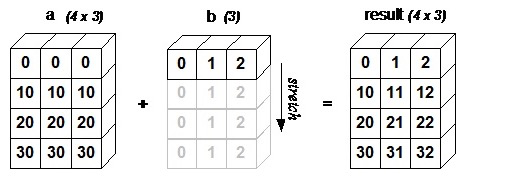

In [84]:
a = np.array([[0.0,0.0,0.0],[10.0,10.0,10.0],[20.0,20.0,20.0],[30.0,30.0,30.0]]) 
b = np.array([1.0])  
print ('数组a：\n',a)  
print ('数组b：\n',b)  
print ('数组a加数组b：\n',a+b)  

数组a：
 [[ 0.  0.  0.]
 [10. 10. 10.]
 [20. 20. 20.]
 [30. 30. 30.]]
数组b：
 [1.]
数组a加数组b：
 [[ 1.  1.  1.]
 [11. 11. 11.]
 [21. 21. 21.]
 [31. 31. 31.]]


## 1.6. 索引和切片

- 一维数组：类似列表

跟列表最重要的区别在于，数组切片是原始数组的视图。这意味着数据不会被复制，视图上的任何修改都会直接反映到源数组上。

In [85]:
arr = np.array(range(10))
arr_slice = arr[3:6]
print('arr:\n',arr)
print('arr_slice:\n',arr_slice)

arr:
 [0 1 2 3 4 5 6 7 8 9]
arr_slice:
 [3 4 5]


In [86]:
ls = list(range(10))
ls_slice = ls[3:6]
print('ls:\n',ls)
print('ls_slice:\n',ls_slice)

ls:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ls_slice:
 [3, 4, 5]


In [87]:
arr_slice[0]= 12345
ls_slice[0] = 12345
print('arr:\n',arr)
print('arr_alice:\n',arr_slice)
#list列表不改变，array数组改变
print('ls:\n',ls)
print('ls_slice:\n',ls_slice)

arr:
 [    0     1     2 12345     4     5     6     7     8     9]
arr_alice:
 [12345     4     5]
ls:
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ls_slice:
 [12345, 4, 5]


切片[ : ]会给数组中的所有值赋值：

In [88]:
arr_slice[:] = 0
print('arr:\n',arr)
print('arr_alice:\n',arr_slice)

arr:
 [0 1 2 0 0 0 6 7 8 9]
arr_alice:
 [0 0 0]


- 如果你想要得到的是ndarray切片的一份副本，就需要进行复制操作，例如arr[5:8].copy()

In [89]:
arr = np.array(range(10))
arr_slice = arr[3:6].copy()
print('arr:\n',arr)
print('arr_alice:\n',arr_slice)
arr_slice[:] = 0
print('arr:\n',arr)
print('arr_alice:\n',arr_slice)

arr:
 [0 1 2 3 4 5 6 7 8 9]
arr_alice:
 [3 4 5]
arr:
 [0 1 2 3 4 5 6 7 8 9]
arr_alice:
 [0 0 0]


- 高维度数组:索引位置上的元素不再是标量而是一维数组

In [90]:
ls = [list(range(5)),list(range(5,10))]
ls

[[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]]

In [91]:
ls[0][2]

2

In [92]:
ls[0,2]

TypeError: list indices must be integers or slices, not tuple

In [98]:
arr = np.array(ls)
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [99]:
arr[0][2]

2

In [100]:
#list列表不允许，数组可以
arr[1,0]

5

In [101]:
arr[0,2:]

array([2, 3, 4])

In [102]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

![img5.jpg](resource/img/img5.jpg)

- 在多维数组中，如果省略了后面的索引，则返回对象会是一个维度低一点的ndarray

In [104]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [105]:
arr3d.shape

(2, 2, 3)

In [106]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


In [107]:
print(arr3d[0,0])

[1 2 3]


In [108]:
print(arr3d[0,0,0])

1


- 标量值和数组都可以被赋值给数组

In [111]:
#将arr3d[0]的数据进行备份
old_values = arr3d[0].copy()
#修改arr3d[0]的值为42
arr3d[0] = 42
print('执行arr3d[0] = 42以后的arr3d\n',arr3d)
print('===========分割线============')
#将一个数组赋值给另外一个数组
arr3d[0] = old_values
print('执行arr3d[0] = old_values以后的arr3d\n',arr3d)

执行arr3d[0] = 42以后的arr3d
 [[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
===========分割线============
执行arr3d[0] = old_values以后的arr3d
 [[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


## 1.7. 布尔型索引

In [112]:
strs = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g'])
data = np.random.randn(7, 4) #随机形成7*4的数组
print(strs)
print(data)

['a' 'b' 'c' 'd' 'e' 'f' 'g']
[[ 0.73894333  0.71716531 -0.8885595   0.1228435 ]
 [ 1.72704606  0.19880647  0.38821248 -1.21280968]
 [-0.10036446  0.56774891  0.30819953 -1.48070474]
 [ 1.65621773  0.53278902  0.71273184 -0.90686557]
 [ 1.40821574 -0.86956136  1.09475452 -1.41490181]
 [ 0.08153658  1.20997212  0.17932655 -1.86265077]
 [ 0.2980772  -0.04476434  1.26956055  2.27040122]]


假设每个字母都对应data数组中的一行

如何选出对应于字母'a'的所有行？？？

In [113]:
print(data > 0)

[[ True  True False  True]
 [ True  True  True False]
 [False  True  True False]
 [ True  True  True False]
 [ True False  True False]
 [ True  True  True False]
 [ True False  True  True]]


In [114]:
print(strs == 'a')

[ True False False False False False False]


In [116]:
#选出为True的那一行，即第一行
print(data[strs == 'a'])

[[ 0.73894333  0.71716531 -0.8885595   0.1228435 ]]


In [117]:
print(data[strs == 'a',2:])

[[-0.8885595  0.1228435]]


- 要选择'a'以外的其他值，既可以使用不等于符号（!=），也可以通过~对条件进行否定

In [123]:
print(strs != 'a')
#~为取反
print(~(strs != 'a'))
#可以理解为哪一行为true，输出哪一行
print(data[strs != 'a'])
print('--------------')
print(data[~(strs == 'a')])

[False  True  True  True  True  True  True]
[ True False False False False False False]
[[ 1.72704606  0.19880647  0.38821248 -1.21280968]
 [-0.10036446  0.56774891  0.30819953 -1.48070474]
 [ 1.65621773  0.53278902  0.71273184 -0.90686557]
 [ 1.40821574 -0.86956136  1.09475452 -1.41490181]
 [ 0.08153658  1.20997212  0.17932655 -1.86265077]
 [ 0.2980772  -0.04476434  1.26956055  2.27040122]]
--------------
[[ 1.72704606  0.19880647  0.38821248 -1.21280968]
 [-0.10036446  0.56774891  0.30819953 -1.48070474]
 [ 1.65621773  0.53278902  0.71273184 -0.90686557]
 [ 1.40821574 -0.86956136  1.09475452 -1.41490181]
 [ 0.08153658  1.20997212  0.17932655 -1.86265077]
 [ 0.2980772  -0.04476434  1.26956055  2.27040122]]


## 1.8. 数组转置和轴对换

- T:转置/轴反转
- transpose：轴对换

In [125]:
arr = np.arange(15).reshape((3, 5))
print('arr:\n',arr)
print('--------------')
print('arr.T:\n',arr.T)
print('--------------')
print('arr:\n',arr)
print('--------------')
#(3, 5) 3的索引是0，5的索引是1，transpose((1,0)  这里的1，0就是索引的位置，索引为1的位置是5，索引为0的位置是3
print('arr.transpose((1,0)):\n',arr.transpose((1,0))) 

arr:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
--------------
arr.T:
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]
--------------
arr:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
--------------
arr.transpose((1,0)):
 [[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


在进行矩阵计算时，经常需要用到该操作，比如利用np.dot计算矩阵内积

In [127]:
arr = np.random.randn(6, 3)
print ('arr:\n',arr)
#注意，直接*是点积
print ('dot_arr:\n',np.dot(arr.T, arr))

arr:
 [[ 0.3728485  -0.92338748  2.15197874]
 [ 0.91772852  1.37356623  0.14187166]
 [ 1.07233311 -0.12291252  1.60926551]
 [ 1.86426744 -0.64460639  1.09575355]
 [-1.39808026 -0.41138835 -0.14508404]
 [ 0.43168442  1.59111555  0.46940372]]
dot_arr:
 [[ 7.74761287  0.84476912  5.10648149]
 [ 0.84476912  5.87084256 -1.88980726]
 [ 5.10648149 -1.88980726  8.68294063]]


对于高维数组，转置需要得到一个由轴编号组成的元组才能对这些轴进行转置

In [129]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr)
print('========================')
print(arr.transpose((1, 0, 2)))
print('========================')
print('arr_T:\n',arr.T)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]]
[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]
arr_T:
 [[[ 0  8]
  [ 4 12]]

 [[ 1  9]
  [ 5 13]]

 [[ 2 10]
  [ 6 14]]

 [[ 3 11]
  [ 7 15]]]


- arr.transpose((1, 0, 2)):第一个轴被换成了第二个，第二个轴被换成了第一个，最后一个轴不变
- arr.T:轴反转

# 2. 通用函数(ufunc)

- 一元函数

![img6.jpg](resource/img/img6.jpg)

![img7.jpg](resource/img/img7.jpg)

- 二元函数

![img8.jpg](resource/img/img8.jpg)

In [131]:
arr = np.arange(10)

print(arr)
print(np.sqrt(arr))
print(np.max(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
9


In [132]:
x = np.random.randn(8)
y = np.random.randn(8)

print('x:\n',x)
print('y:\n',y)
print(np.maximum(x, y))

x:
 [-0.47409472  1.31340762 -1.04907696 -0.61641238 -1.38424479  0.11542378
  0.66568423 -0.1421786 ]
y:
 [-1.81325247 -0.42565347  1.57163557 -0.42664874  1.29813627  1.48839213
 -1.38286465  1.33668699]
[-0.47409472  1.31340762  1.57163557 -0.42664874  1.29813627  1.48839213
  0.66568423  1.33668699]


# 3. 利用数组进行数据处理

我们想要在一组值（网格型）上计算sqrt(x^2+y^2)

In [134]:
points = np.arange(-5, 5, 0.01) # 1000个值，-5，-4.99...4.99
print(points[0:10])
print(len(points))
xs, ys = np.meshgrid(points, points) #生成网格型数据，接受两个一维数组生成两个二维矩阵
print(xs)
print('---------')
print(ys)

[-5.   -4.99 -4.98 -4.97 -4.96 -4.95 -4.94 -4.93 -4.92 -4.91]
1000
[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
---------
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [135]:
z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]]


## 3.1. 将条件逻辑表述为数组运算

numpy.where函数是三元表达式x if condition else y的矢量化版本

In [136]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [137]:
result = []
for x,y,c in zip(xarr,yarr,cond):
    if c:
        result.append(x)
    else:
        result.append(y)
print(result)

[1.1, 2.2, 1.3, 1.4, 2.5]


- 对大数组的处理速度很慢
- 无法用于多维数组

In [138]:
res = np.where(cond, xarr, yarr)
print(res)

[1.1 2.2 1.3 1.4 2.5]


- np.where的第二个和第三个参数不必是数组，它们都可以是标量值
- 在数据分析工作中，where通常用于根据另一个数组而产生一个新的数组

In [139]:
arr = np.random.randn(4, 4)
print(arr)
print(arr > 0)
print(np.where(arr > 0, 'a', -2))#满足条件赋值为a，不满足条件赋值为-2

[[-0.94628034  0.17103765  0.56957056  0.20058923]
 [ 0.63358805  1.37445497  0.55849102  0.07161402]
 [ 0.58739942  1.18460788  1.36354977  1.16719255]
 [ 1.78976936  0.3596162  -0.92282565 -0.33821766]]
[[False  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True False False]]
[['-2' 'a' 'a' 'a']
 ['a' 'a' 'a' 'a']
 ['a' 'a' 'a' 'a']
 ['a' 'a' '-2' '-2']]


- 使用np.where，可以将标量和数组结合起来

In [140]:
print(arr)
print("---------")
print(np.where(arr > 0, 2, arr))

[[-0.94628034  0.17103765  0.56957056  0.20058923]
 [ 0.63358805  1.37445497  0.55849102  0.07161402]
 [ 0.58739942  1.18460788  1.36354977  1.16719255]
 [ 1.78976936  0.3596162  -0.92282565 -0.33821766]]
---------
[[-0.94628034  2.          2.          2.        ]
 [ 2.          2.          2.          2.        ]
 [ 2.          2.          2.          2.        ]
 [ 2.          2.         -0.92282565 -0.33821766]]


## 3.2. 数学和统计方法

- 通过数组上的一组数学函数对整个数组或某个轴向的数据进行统计计算
- 求和、平均值、方差、标准差、中位数：sum, mean/average, var, std, median 

In [141]:
arr = np.random.randn(5, 4)
print(arr)
print(arr.mean())
print(np.mean(arr))
print(arr.sum())

[[ 0.58531626  1.0096224  -0.93882064 -2.5993093 ]
 [-0.04158886 -0.72823671 -0.16086106  0.18851362]
 [ 1.41413564  1.32462242  0.57877848  0.78255148]
 [ 2.00459926 -0.76840553 -0.42879974  0.78832656]
 [ 1.05270904  1.24343494 -1.05406584 -0.52211261]]
0.1865204908065332
0.1865204908065332
3.7304098161306642


- axis选项参数，用于计算该轴向上的统计值

In [142]:
#arr.mean(1)是“计算行的平均值”，arr.sum(0)是“计算每列的和”
print(arr.mean(axis=1)) # C默认的排列，1是行，0是列
print(arr.sum(axis=0))

[-0.48579782 -0.18554325  1.02502201  0.39893014  0.17999138]
[ 5.01517134  2.08103752 -2.0037688  -1.36203025]


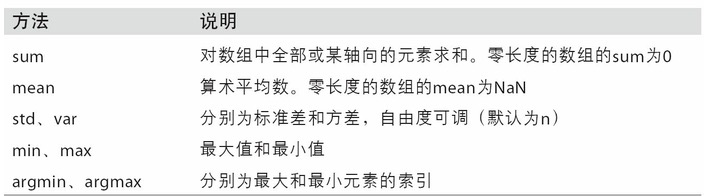

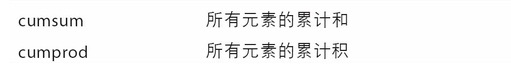

In [143]:
#统计>0的数目
arr = np.random.randn(10)
print(arr)
print((arr > 0).sum())
arr_6=np.array([1,2,3,4-5,-1])
print('arr_6大于0的数目为:',(arr_6 > 0).sum())#把true看成1了,把false看成0了

[-1.74099106 -0.99073951  0.61563891 -1.49386455 -0.03631519 -0.07298659
 -0.33955047 -0.38984794 -0.36746679 -2.00042973]
1
arr_6大于0的数目为: 3


In [144]:
arr_1=np.array([True,True,False])
print((arr_1>0))
print((arr_1>0).sum())

[ True  True False]
2


## 3.3. 排序

- numpy.sort()
- sort(a, axis=-1, kind=None, order=None)
- Return a sorted copy of an array.

In [145]:
#help(np.sort)

In [146]:
import numpy as np  

a = np.array([[3,7],[9,1]])  
print ('a:\n',a)  
print('*********')
print (np.sort(a))  #默认按行排序
print ('*********')   
print (np.sort(a, axis =  0))  #axis=0代表列
print ('**********')  

dt = np.dtype([('name',  'S10'),('age',  int)]) 
a = np.array([("raju",21),("anil",25),("ravi",  17),  ("amar",27)], dtype = dt)  
print ('a:\n',a) 
print('***********')
print (np.sort(a, order =  'age'))

a:
 [[3 7]
 [9 1]]
*********
[[3 7]
 [1 9]]
*********
[[3 1]
 [9 7]]
**********
a:
 [(b'raju', 21) (b'anil', 25) (b'ravi', 17) (b'amar', 27)]
***********
[(b'ravi', 17) (b'raju', 21) (b'anil', 25) (b'amar', 27)]


- numpy.argsort()
- 返回数据的索引数组

In [147]:
arr = np.random.randn(5, 3)
print(arr)
print('***********')
arr.sort(1)#这里可以理解为axis=1
print(arr)

[[-1.64686685 -0.78298683 -0.15326144]
 [ 0.80869131 -0.68901984 -0.1330472 ]
 [ 0.45065706 -1.36087226  0.84654814]
 [-1.39191596 -0.08307836 -0.41725936]
 [ 0.29151813 -0.59928374 -2.12175704]]
***********
[[-1.64686685 -0.78298683 -0.15326144]
 [-0.68901984 -0.1330472   0.80869131]
 [-1.36087226  0.45065706  0.84654814]
 [-1.39191596 -0.41725936 -0.08307836]
 [-2.12175704 -0.59928374  0.29151813]]


In [148]:
arr = np.random.randn(5, 3)
print(arr)
print('***********')
arr.argsort(1)#给出的是排序的索引，例如1是原来矩阵每一行的第2个位置 ，2代表原来矩阵每一行的第3个位置

[[-0.08197272 -1.4694239  -0.94235798]
 [-0.21125896 -1.03135569  1.23696576]
 [ 0.48177088 -0.92086096  0.45096641]
 [ 0.70665004 -0.0342253   0.16274403]
 [ 1.09147366  0.9724803  -0.26177917]]
***********


array([[1, 2, 0],
       [1, 0, 2],
       [1, 2, 0],
       [1, 2, 0],
       [2, 1, 0]], dtype=int64)

- numpy.lexsort()

In [149]:
#help(np.lexsort)

# 4. `伪`随机数生成

In [150]:
#help(np.random)#太。。。。长了。。。。。不建议

In [156]:
#注意np.random.randn(5, 3)是生成正态分布，下面的介绍可以看一下
#生成标准正态分布
samples = np.random.normal(size=(4, 4))
print(samples)
samples1 = np.random.normal((4, 4))
print('----')
print(samples)

[[-2.05201254 -0.18482137  0.98983365 -1.43816291]
 [ 1.3325321  -1.4447805   3.38552386  1.56310339]
 [ 0.69132803  0.25340619  0.50518452  0.80863303]
 [-0.61915286 -1.51648414  0.26293855 -0.02557348]]
----
[[-2.05201254 -0.18482137  0.98983365 -1.43816291]
 [ 1.3325321  -1.4447805   3.38552386  1.56310339]
 [ 0.69132803  0.25340619  0.50518452  0.80863303]
 [-0.61915286 -1.51648414  0.26293855 -0.02557348]]


In [157]:
N = 1000000
np.random.normal(size=N)

array([-0.83305107,  0.11913504,  2.4429357 , ..., -0.54170843,
        0.95112354, -0.46685488])

In [158]:
# from random import normalvariate

# N = 1000000
# %timeit samples = [normalvariate(0, 1) for _ in range(N)]
# %timeit np.random.normal(size=N)

- 伪：算法生成
- 设定种子

![img9.jpg](resource/img/img9.jpg)

![img10.jpg](resource/img/img10.jpg)